In [26]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import networkx as nx 
from scipy import stats
import matplotlib 
import matplotlib.pyplot as plt 
# import shapely
from kneed import KneeLocator
   
# import seaborn as sns

In [27]:
rf_rfe_test = pd.read_csv(r'results/Combining/final_columns_rf_rfe.csv')
rf_rfe_test

,var,imp
0,ETHBTC__technical_analysis_candles__rsi,0.112650
1,ETHBTC__technical_analysis_candles__macdhist,0.022072
2,ETHBTC__technical_analysis_candles__macd,0.019724
3,ETHBTC__ticker_info__taker_buy_asset_volume,0.016933
4,ETHBTC__ticker_info__number_trades,0.011073
5,ETHBTC__ticker_info__askQty,0.008743
6,ETHBTC__ticker_info__bidQty,0.007863
7,ETH__twitter_info_aggregated__relative_subject...,0.007204
8,general_info__twitter_info_aggregated__relativ...,0.007183
9,BTC__twitter_info_aggregated__relative_polarit...,0.007174


In [28]:
rf_rfe_test['norm'] = rf_rfe_test['imp']/sum(rf_rfe_test['imp'])

In [29]:
rf_rfe_test['cum'] = rf_rfe_test['norm'].cumsum()
rf_rfe_test['cum2'] = rf_rfe_test['imp'].cumsum()

In [30]:
sum(rf_rfe_test['imp'])

0.5477334553612461

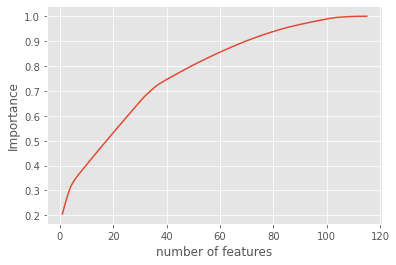

In [31]:
kneesMatrix = [] 
impNodes = []
 
y = rf_rfe_test['norm']#.sort_values(ascending=False) 
x = range(1, len(y)+1)
kn = KneeLocator(x, y,S=20, curve='convex', direction='increasing')#,interp_method='polynomial')
kneesMatrix.append([kn.knee,len(rf_rfe_test['norm'])])
impNodes.append([rf_rfe_test['norm'].head(kn.knee).index.values])

#plot
fig1 = plt.subplots()  
plt.xlabel('number of features')
plt.ylabel('Importance')
plt.plot(x, rf_rfe_test['cum'], '-')
# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

([0.01, 0.1, 1, 3, 5, 10, 100, 200, 400, 600, 1000], [6, 6, 6, 6, 6, 6, 6, None, None, None, None])


C:\Users\lexfo\anaconda3\lib\site-packages\kneed\knee_locator.py:196: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


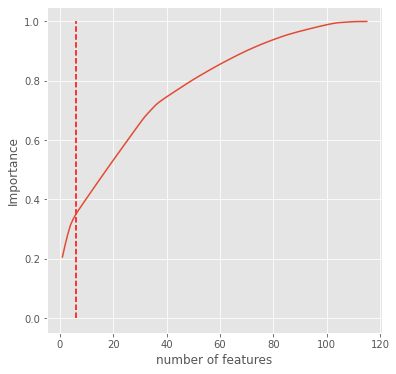

In [34]:
sensitivity = [0.01,0.1,1, 3, 5, 10, 100, 200, 400, 600, 1000]
knees = []
norm_knees = []

# n = 1000
# x = range(1, n + 1)
# y = sorted(np.random.gamma(0.5, 1.0, n), reverse=True)
y = rf_rfe_test['norm']#.sort_values(ascending=False) 
x = range(1, len(y)+1)

for s in sensitivity:
    kl = KneeLocator(x, y, curve='convex', direction='decreasing', S=s)
    knees.append(kl.knee)
#     norm_knees.append(kl.norm_knee)

print((sensitivity,knees))
# [43, 137, 178, 258, 305, 482, 482]

knees = list(dict.fromkeys(knees))
# print([nk.round(2) for nk in norm_knees])
# [0.04, 0.14, 0.18, 0.26, 0.3, 0.48, 0.48]

import matplotlib.pyplot as plt
# plt.style.use('ggplot');
# plt.figure(figsize=(8, 6));
# plt.plot(kl.x_normalized, kl.y_normalized);
# plt.plot(kl.x_difference, kl.y_difference
colors = ['r', 'g', 'k', 'm', 'c', 'orange']
# for k, c, s in zip(norm_knees, colors, sensitivity):
#     plt.vlines(k, 0, 1, linestyles='--', colors=c, label=f'S = {s}');
# plt.legend();


# fig1 = plt.subplots()
plt.style.use('ggplot');
plt.figure(figsize=(6, 6));

plt.xlabel('number of features')
plt.ylabel('Importance')
plt.plot(x, rf_rfe_test['cum'], '-')
for k, c, s in zip(knees, colors, sensitivity):
    plt.vlines(k, 0,1, linestyles='--', colors=c, label=f'S = {s}');

# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [15]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import networkx as nx 
from scipy import stats
import matplotlib 
import matplotlib.pyplot as plt 
# import shapely
from kneed import KneeLocator
   
# import seaborn as sns

In [16]:
XGBoost_test = pd.read_csv(r'results/Combining/final_columns_XGBoost.csv')
XGBoost_test

,var,imp
0,ETHBTC__technical_analysis_candles__rsi,19374
1,ETHBTC__technical_analysis_candles__macdhist,17927
2,ETHBTC__technical_analysis_candles__macd,14729
3,ETHBTC__ticker_info__open,14212
4,ETHBTC__ticker_info__bidQty,6650
5,ETHBTC__ticker_info__askQty,6407
6,ETH__twitter_info_aggregated__relative_subject...,6139
7,BTC__twitter_info_aggregated__relative_polarit...,6041
8,ETH__twitter_info_aggregated__relative_subject...,6016
9,BTC__twitter_info_aggregated__relative_subject...,5956


In [17]:
XGBoost_test['norm'] = XGBoost_test['imp']/sum(XGBoost_test['imp'])

In [18]:
XGBoost_test['cum'] = XGBoost_test['norm'].cumsum()
XGBoost_test['cum2'] = XGBoost_test['imp'].cumsum()

In [19]:
sum(XGBoost_test['imp'])

326478

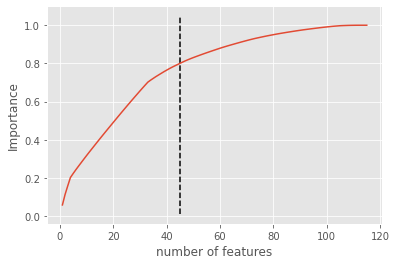

In [20]:
kneesMatrix = [] 
impNodes = []
 
y = XGBoost_test['norm']#.sort_values(ascending=False) 
x = range(1, len(y)+1)
kn = KneeLocator(x, y,S=20, curve='convex', direction='decreasing',interp_method='polynomial')
kneesMatrix.append([kn.knee,len(XGBoost_test['norm'])])
impNodes.append([XGBoost_test['norm'].head(kn.knee).index.values])

#plot
fig1 = plt.subplots()  
plt.xlabel('number of features')
plt.ylabel('Importance')
plt.plot(x, XGBoost_test['cum'], '-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

([0.01, 0.1, 1, 3, 5, 10, 100, 200, 400, 600, 1000], [12, 12, 12, 12, 12, 12, 45, 45, 45, 45, 45])


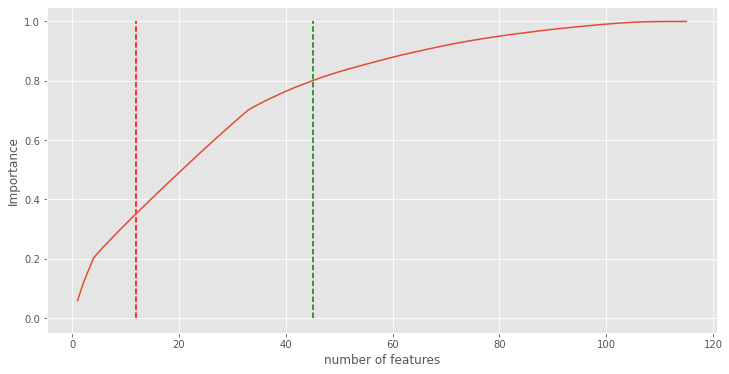

In [21]:
sensitivity = [0.01,0.1,1, 3, 5, 10, 100, 200, 400, 600, 1000]
knees = []
norm_knees = []

# n = 1000
# x = range(1, n + 1)
# y = sorted(np.random.gamma(0.5, 1.0, n), reverse=True)
y = XGBoost_test['norm']#.sort_values(ascending=False) 
x = range(1, len(y)+1)

for s in sensitivity:
    kl = KneeLocator(x, y, curve='convex', direction='decreasing',interp_method='polynomial', S=s)
    knees.append(kl.knee)
#     norm_knees.append(kl.norm_knee)

print((sensitivity,knees))
# [43, 137, 178, 258, 305, 482, 482]

knees = list(dict.fromkeys(knees))
# print([nk.round(2) for nk in norm_knees])
# [0.04, 0.14, 0.18, 0.26, 0.3, 0.48, 0.48]

import matplotlib.pyplot as plt
# plt.style.use('ggplot');
# plt.figure(figsize=(8, 6));
# plt.plot(kl.x_normalized, kl.y_normalized);
# plt.plot(kl.x_difference, kl.y_difference
colors = ['r', 'g', 'k', 'm', 'c', 'orange']
# for k, c, s in zip(norm_knees, colors, sensitivity):
#     plt.vlines(k, 0, 1, linestyles='--', colors=c, label=f'S = {s}');
# plt.legend();


# fig1 = plt.subplots()
plt.style.use('ggplot');
plt.figure(figsize=(12, 6));

plt.xlabel('number of features')
plt.ylabel('Importance')
plt.plot(x, XGBoost_test['cum'], '-')
for k, c, s in zip(knees, colors, sensitivity):
    plt.vlines(k, 0,1, linestyles='--', colors=c, label=f'S = {s}');

# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [ ]:
lexPik = np.load('results/Feature_importance_ranking/ranking_rf_rfe_345.npy',allow_pickle='TRUE')

In [ ]:
lexPik

In [ ]:
df = pd.DataFrame(lexPik[0:],columns=['var','imp'])
df['imp'] = df['imp'].astype(str).astype(float)

In [ ]:
df['cum'] = df['imp'].cumsum()

In [ ]:
df

In [ ]:
kneesMatrix = [] 
impNodes = []
 
y = df['imp']#.sort_values(ascending=False) 
x = range(1, len(y)+1)
kn = KneeLocator(x, y,S=2, curve='convex', direction='decreasing')
kneesMatrix.append([kn.knee,len(df['imp'])])
impNodes.append([df['imp'].head(kn.knee).index.values])

#plot
fig1 = plt.subplots()  
plt.xlabel('number of features')
plt.ylabel('Importance')
plt.plot(x, df['cum'], '-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [ ]:
sensitivity = [0.01,0.1,1, 3, 5, 10, 100, 200, 400, 600, 1000]
knees = []
norm_knees = []

# n = 1000
# x = range(1, n + 1)
# y = sorted(np.random.gamma(0.5, 1.0, n), reverse=True)
y = df['imp']#.sort_values(ascending=False) 
x = range(1, len(y)+1)

for s in sensitivity:
    kl = KneeLocator(x, y, curve='convex', direction='decreasing', S=s)
    knees.append(kl.knee)
#     norm_knees.append(kl.norm_knee)

print((sensitivity,knees))
# [43, 137, 178, 258, 305, 482, 482]

knees = list(dict.fromkeys(knees))
# print([nk.round(2) for nk in norm_knees])
# [0.04, 0.14, 0.18, 0.26, 0.3, 0.48, 0.48]

import matplotlib.pyplot as plt
# plt.style.use('ggplot');
# plt.figure(figsize=(8, 6));
# plt.plot(kl.x_normalized, kl.y_normalized);
# plt.plot(kl.x_difference, kl.y_difference
colors = ['r', 'g', 'k', 'm', 'c', 'orange']
# for k, c, s in zip(norm_knees, colors, sensitivity):
#     plt.vlines(k, 0, 1, linestyles='--', colors=c, label=f'S = {s}');
# plt.legend();


# fig1 = plt.subplots()
plt.style.use('ggplot');
plt.figure(figsize=(12, 6));

plt.xlabel('number of features')
plt.ylabel('Importance')
plt.plot(x, df['cum'], '-')
for k, c, s in zip(knees, colors, sensitivity):
    plt.vlines(k, 0,1, linestyles='--', colors=c, label=f'S = {s}');

# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [ ]:
kl.y

In [ ]:
kn.knee

In [ ]:
y